In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from numpy import loadtxt

In [288]:
pd.set_option('display.max_rows', 100)

In [289]:
test_df = pd.read_csv("test.csv")

In [290]:
df = pd.read_csv("train.csv")
df.dropna(inplace=True)

In [291]:
df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
5,189129552,10.5,3407.0,182.0,0.0000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,correct
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,correct
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,correct
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31,correct


In [292]:
def change_date(date_time_str):
    date_time_obj = datetime.datetime.strptime(date_time_str, '%m/%d/%Y %H:%M')
    d_time = date_time_obj.time()
    return [(d_time.hour*60+d_time.minute), date_time_obj.weekday()]

In [293]:
pickup_time = np.array([change_date(x) for x in df['pickup_time'].values])
df['pickup_time'], df['week_day'] = pickup_time[:,0], pickup_time[:,1]

drop_time = np.array([change_date(x) for x in df['drop_time'].values])
df['drop_time'] = drop_time[:,0]

In [279]:
df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,week_day
0,189123628,10.5,834.0,56.0,0.0000,64.0,20,34,6.86252,79.8993,6.90330,79.8783,270.32,correct,4
1,189125358,10.5,791.0,47.0,0.0000,134.0,56,69,6.88589,79.8984,6.91373,79.8923,197.85,correct,4
2,189125719,10.5,1087.0,80.0,0.0000,61.0,68,86,6.90839,79.8651,6.93669,79.9146,301.64,correct,4
3,189127273,10.5,598.0,271.0,15.6638,68.0,147,157,6.92570,79.8895,6.92748,79.8971,82.30,correct,4
5,189129552,10.5,3407.0,182.0,0.0000,112.0,338,395,7.13402,79.8969,6.91865,79.8649,1065.02,correct,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1327,1341,7.29073,80.6367,7.28891,80.6557,198.26,correct,4
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1387,1423,6.90569,79.8516,6.95089,79.9389,581.23,correct,4
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1401,1405,7.09210,79.9000,7.10135,79.9017,76.20,correct,4
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1419,1433,6.94540,79.8768,6.93574,79.9010,133.31,correct,4


In [280]:
df.reset_index(drop=True,inplace=True)
df = pd.concat([df,pd.get_dummies(df['week_day'].values)],axis=1)
df = df.drop(columns=['week_day','tripid'])

In [281]:
df

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,0,1,2,3,4,5,6
0,10.5,834.0,56.0,0.0000,64.0,20,34,6.86252,79.8993,6.90330,79.8783,270.32,correct,0,0,0,0,1,0,0
1,10.5,791.0,47.0,0.0000,134.0,56,69,6.88589,79.8984,6.91373,79.8923,197.85,correct,0,0,0,0,1,0,0
2,10.5,1087.0,80.0,0.0000,61.0,68,86,6.90839,79.8651,6.93669,79.9146,301.64,correct,0,0,0,0,1,0,0
3,10.5,598.0,271.0,15.6638,68.0,147,157,6.92570,79.8895,6.92748,79.8971,82.30,correct,0,0,0,0,1,0,0
4,10.5,3407.0,182.0,0.0000,112.0,338,395,7.13402,79.8969,6.91865,79.8649,1065.02,correct,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16963,10.5,838.0,93.0,5.4219,451.0,1327,1341,7.29073,80.6367,7.28891,80.6557,198.26,correct,0,0,0,0,1,0,0
16964,10.5,2151.0,428.0,0.0000,39.0,1387,1423,6.90569,79.8516,6.95089,79.9389,581.23,correct,0,0,0,0,1,0,0
16965,10.5,263.0,9.0,0.0000,110.0,1401,1405,7.09210,79.9000,7.10135,79.9017,76.20,correct,0,0,0,0,1,0,0
16966,10.5,858.0,115.0,0.0000,317.0,1419,1433,6.94540,79.8768,6.93574,79.9010,133.31,correct,0,0,0,0,1,0,0


In [282]:
def get_distance(lat1,lon1,lat2,lon2):
    
    R = 6373.0
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
#     distance = np.where(distance==0.0, -1, distance)
    thresh_distance = np.where(distance<1, 1, distance)

#     print("Result:", distance)
    return thresh_distance, distance

In [323]:
df['trip_distance'], df['acct_trip_distance'] = get_distance(df['pick_lat'],df['pick_lon'],df['drop_lat'],df['drop_lon'])

In [324]:
df['per_km'] = df['fare']/df['trip_distance']

In [285]:
df = df.drop(columns=['pick_lat','pick_lon','drop_lat','drop_lon','trip_distance'])

In [ ]:
df[df['trip_distance'] == 1]

In [ ]:
df[df['trip_distance'] == 1][['meter_waiting','duration','fare','label','per_km']]

In [13]:
labels = df['label'] == 'correct'
labels = labels.astype('int')

In [15]:
labels

0        1
1        1
2        1
3        1
5        1
        ..
17171    1
17172    1
17173    1
17174    1
17175    1
Name: label, Length: 16968, dtype: int32

In [97]:
correct_trips = df[df['label'] == 'correct']

In [98]:
incorrect_trips = df[df['label'] == 'incorrect']

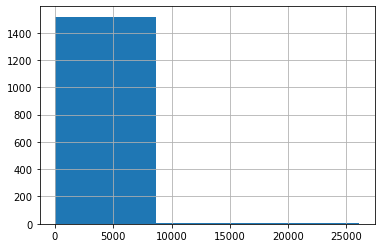

In [99]:
incorrect_trips['fare'].hist(bins=3)

In [ ]:
correct_trips['fare'].hist(bins=3)

In [ ]:
incorrect_trips['fare'].describe()

In [ ]:
correct_trips.sort_values(by='per_km')

In [ ]:
index = 3

value = df.iloc[index]
get_distance(value[8],value[9],value[10],value[11])

In [ ]:
df = df.drop(columns=['label','tripid'])

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
df[df['additional_fare'] < 1]

In [ ]:
df.describe()

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df.values)
scaled = pd.DataFrame(x_scaled)

In [ ]:
scaled.describe()

In [ ]:
(df['additional_fare'].apply(lambda x: np.log10(x+0.1)) < 2).sum() # 0,2.1

In [ ]:
(df['duration'].apply(lambda x: np.log10(x+0.1)) > 1).sum()

In [ ]:
df['duration'].apply(lambda x: np.log10(x+0.1)).hist(bins=100,range=(1,4))

In [ ]:
df['meter_waiting'].apply(lambda x: np.log10(x+0.1)).hist(bins=100,range=(-1,3))

In [ ]:
(df['meter_waiting_fare'].apply(lambda x: np.log10(x+0.1)) >= -1).sum()

In [ ]:
df['meter_waiting_fare'].apply(lambda x: np.log10(x+0.1)).hist(bins=10,range=(-1,4))

In [ ]:
(df['per_km'].apply(lambda x: np.log10(x+0.1)) < 0).sum()

In [ ]:
df['per_km'].apply(lambda x: np.log10(x+0.1)).hist(bins=10)

In [ ]:
df['per_km'].apply(lambda x: np.log10(x+0.1)).hist(bins=100,range=(-1,3))

In [ ]:
df['acct_trip_distance'].apply(lambda x: np.log10(x+0.1)).hist(bins=100,range=(-1,2))

In [ ]:
(df['trip_distance'].apply(lambda x: np.log10(x)) > 2).sum()

In [ ]:
df['trip_distance'].apply(lambda x: np.log10(x)).describe()

In [ ]:
imp = IterativeImputer(max_iter=10, random_state=0)

In [ ]:
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])

In [ ]:
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 3]]
print(imp.transform(X_test))

In [ ]:
data = df[['additional_fare','duration','meter_waiting','meter_waiting_fare','meter_waiting_till_pickup','fare']].values

In [ ]:
data

In [ ]:
imp.fit(data)

In [ ]:
imp.transform(data)

In [ ]:
scaled = pd.DataFrame()

In [ ]:
scaled['duration'] = df['duration'].apply(lambda x: np.log10(x+0.1)) # 1,4
scaled['additional_fare'] = df['additional_fare'].apply(lambda x: np.log10(x+0.1)) # 0,2.1
scaled['meter_waiting'] = df['meter_waiting'].apply(lambda x: np.log10(x+0.1)) # -1,3
scaled['meter_waiting_fare'] = df['meter_waiting_fare'].apply(lambda x: np.log10(x+0.1)) # -1,4
scaled['per_km'] = df['per_km'].apply(lambda x: np.log10(x+0.1)) # -1,3
scaled['trip_distance'] = df['acct_trip_distance'].apply(lambda x: np.log10(x+0.1)) # -1,2

In [ ]:
scaled.describe()

In [ ]:
scaled.describe()

In [ ]:
scaled['duration'] = np.where(scaled['duration'] > 4, 4, scaled['duration'])
scaled['duration'] = np.where(scaled['duration'] < 1, 1, scaled['duration'])
scaled['additional_fare'] = np.where(scaled['additional_fare'] < 0, 0, scaled['additional_fare'])
scaled['additional_fare'] = np.where(scaled['additional_fare'] > 2.1, 2.1, scaled['additional_fare'])
scaled['meter_waiting'] = np.where(scaled['meter_waiting'] > 3, 3, scaled['meter_waiting'])
scaled['meter_waiting_fare'] = np.where(scaled['meter_waiting_fare'] > 3, 3, scaled['meter_waiting_fare'])
scaled['per_km'] = np.where(scaled['per_km'] > 3, 3, scaled['per_km'])
scaled['trip_distance'] = np.where(scaled['trip_distance'] > 2, 2, scaled['trip_distance'])

In [ ]:
result.max()

In [ ]:
scaled['meter_waiting'].min()

In [ ]:
for i in scaled.columns:
    scaled[i].hist()

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [ ]:
labels = labels.astype('int')

In [ ]:
labels[:20]

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(
    scaled.values,
    labels.values,
    test_size=0.33,
    shuffle=True,
    stratify=labels
)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
trip_train = xgb.DMatrix(X_train, label=y_train)
trip_test = xgb.DMatrix(X_eval, label=y_eval)

In [ ]:
booster_params = {
    'eta': 0.25,
    'gamma':1,
    "eval_metric": "error",
    'max_depth': 10,
    'subsample': 0.2,
    'sampling_method': 'gradient_based',
    'lambda': 1.5,
    'grow_policy': 'lossguide',
    'num_parallel_tree':16,
    'objective': 'reg:logistic',
    'verbosity':0,
    } 
results = {}

In [ ]:
trip_model = xgb.train(booster_params,trip_train,num_boost_round=100,evals=[(trip_test, 'val')], early_stopping_rounds=10,evals_result=results)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
preds = trip_model.predict(trip_test)

In [ ]:
# preds = np.round(preds)

In [ ]:
sum(preds)

In [ ]:
f1_score(y_eval,preds)

In [ ]:
for j in range(10):
    threshold = j / 10
    
    thresh_pred = np.array((preds > threshold).astype('int'))
    print(f1_score(y_eval,thresh_pred), threshold)


In [ ]:
len(preds)

In [ ]:
for j in range(0,10,0.1):
    print(j)

In [ ]:
trip_model.best_iteration

In [ ]:
df = df.drop(columns=['tripid','per_km','trip_distance'])

In [ ]:
df = df.drop(columns=['label'])

In [ ]:
df

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
transformer = RobustScaler().fit(df.values)

In [ ]:
robust_df = pd.DataFrame(transformer.transform(df.values))

In [ ]:
robust_df[2].hist(bins=100,range=(0,3))
scaled['meter_waiting'].hist(bins=100)
min_max_scaled[2].hist(bins=100)

In [ ]:
scaled.describe()

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(scaled)
min_max_scaled = pd.DataFrame(x_scaled)

In [ ]:
neg_inst = labels.shape[0] - sum(labels)

In [ ]:
neg_inst/sum(labels)

In [100]:
correct_trips

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,week_day
0,189123628,10.5,834.0,56.0,0.0000,64.0,20,34,6.86252,79.8993,6.90330,79.8783,270.32,correct,4
1,189125358,10.5,791.0,47.0,0.0000,134.0,56,69,6.88589,79.8984,6.91373,79.8923,197.85,correct,4
2,189125719,10.5,1087.0,80.0,0.0000,61.0,68,86,6.90839,79.8651,6.93669,79.9146,301.64,correct,4
3,189127273,10.5,598.0,271.0,15.6638,68.0,147,157,6.92570,79.8895,6.92748,79.8971,82.30,correct,4
5,189129552,10.5,3407.0,182.0,0.0000,112.0,338,395,7.13402,79.8969,6.91865,79.8649,1065.02,correct,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1327,1341,7.29073,80.6367,7.28891,80.6557,198.26,correct,4
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1387,1423,6.90569,79.8516,6.95089,79.9389,581.23,correct,4
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1401,1405,7.09210,79.9000,7.10135,79.9017,76.20,correct,4
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1419,1433,6.94540,79.8768,6.93574,79.9010,133.31,correct,4


In [101]:
incorrect_trips

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,week_day
10,189135814,10.5,26.0,19.0,0.0000,73.0,447,447,7.00355,79.8819,7.13279,79.8868,694.37,incorrect,4
11,189140969,10.5,31.0,20.0,0.0000,130.0,462,462,6.90871,79.8978,6.91368,79.8572,235.59,incorrect,4
13,189147041,10.5,1260.0,30.0,0.0000,9.0,464,485,7.12626,79.9817,7.12290,79.9687,111.21,incorrect,4
25,189160756,10.5,358.0,66.0,0.0000,79.0,531,537,6.05858,80.2003,6.05566,80.1810,210.58,incorrect,4
26,189161377,10.5,644.0,638.0,14.7968,108.0,534,545,6.91029,79.8543,6.91185,79.8556,113.71,incorrect,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17098,213639520,10.5,2532.0,2529.0,88.3762,142.0,936,978,6.91686,79.8492,6.91672,79.8492,250.05,incorrect,4
17111,213658727,10.5,943.0,359.0,0.2312,90.0,982,998,7.32362,80.6229,7.34365,80.6504,111.04,incorrect,4
17130,213689462,40.5,4310.0,1314.0,75.9492,469.0,1042,1114,6.91819,79.8627,6.83700,79.8947,902.02,incorrect,4
17131,213703973,40.5,913.0,445.0,0.0000,47.0,1059,1074,7.29842,80.6363,7.30808,80.6399,534.00,incorrect,4


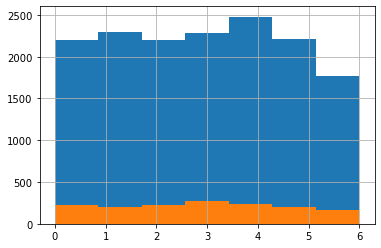

In [104]:
correct_trips['week_day'].hist(bins=7,stacked=True,)
incorrect_trips['week_day'].hist(bins=7,stacked=True,)

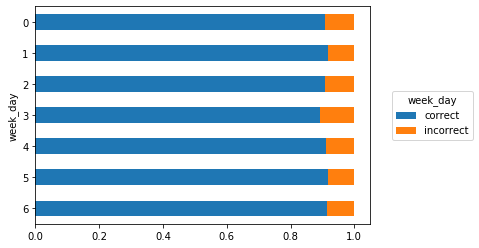

In [133]:
col_name = 'week_day'
counts = (df[[col_name, 'label']]
              .groupby([col_name,'label'])
              .size()
              .unstack('label')
         )

label_counts = counts.sum(axis='columns')
counts = counts.div(label_counts,axis='index')
ax = counts.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='week_day'
)

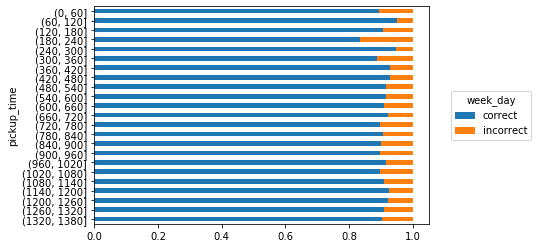

In [131]:
bins = [x*60 for x in range(24)]
counts = df.groupby([pd.cut(df["pickup_time"], bins), 'label']).size().unstack('label')
label_counts = counts.sum(axis='columns')
counts = counts.div(label_counts,axis='index')
ax = counts.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='week_day'
)

In [286]:
bins = [x*60 for x in range(24)]
df['time_bin'] = np.searchsorted(bins, df['pickup_time'].values)
df

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,fare,label,0,1,2,3,4,5,6,acct_trip_distance,per_km,time_bin
0,10.5,834.0,56.0,0.0000,64.0,20,34,270.32,correct,0,0,0,0,1,0,0,5.094369,53.062512,1
1,10.5,791.0,47.0,0.0000,134.0,56,69,197.85,correct,0,0,0,0,1,0,0,3.169052,62.431918,1
2,10.5,1087.0,80.0,0.0000,61.0,68,86,301.64,correct,0,0,0,0,1,0,0,6.307375,47.823385,2
3,10.5,598.0,271.0,15.6638,68.0,147,157,82.30,correct,0,0,0,0,1,0,0,0.862217,82.300000,3
4,10.5,3407.0,182.0,0.0000,112.0,338,395,1065.02,correct,0,0,0,0,1,0,0,24.214638,43.982486,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16963,10.5,838.0,93.0,5.4219,451.0,1327,1341,198.26,correct,0,0,0,0,1,0,0,2.106037,94.138917,23
16964,10.5,2151.0,428.0,0.0000,39.0,1387,1423,581.23,correct,0,0,0,0,1,0,0,10.871789,53.462222,24
16965,10.5,263.0,9.0,0.0000,110.0,1401,1405,76.20,correct,0,0,0,0,1,0,0,1.045847,72.859628,24
16966,10.5,858.0,115.0,0.0000,317.0,1419,1433,133.31,correct,0,0,0,0,1,0,0,2.879981,46.288506,24


In [287]:
a = pd.get_dummies(df['time_bin'].values)

column_names = {}
for i in a.columns:
    column_names[i] = f"hour_{i}"
    
a = a.rename(columns=column_names)
df = pd.concat([df,a],axis=1)
df = df.drop(columns=['pickup_time','drop_time'])
df

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,0,1,2,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24
0,10.5,834.0,56.0,0.0000,64.0,270.32,correct,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.5,791.0,47.0,0.0000,134.0,197.85,correct,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.5,1087.0,80.0,0.0000,61.0,301.64,correct,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.5,598.0,271.0,15.6638,68.0,82.30,correct,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.5,3407.0,182.0,0.0000,112.0,1065.02,correct,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16963,10.5,838.0,93.0,5.4219,451.0,198.26,correct,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16964,10.5,2151.0,428.0,0.0000,39.0,581.23,correct,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16965,10.5,263.0,9.0,0.0000,110.0,76.20,correct,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16966,10.5,858.0,115.0,0.0000,317.0,133.31,correct,0,0,0,...,0,0,0,0,0,0,0,0,0,1


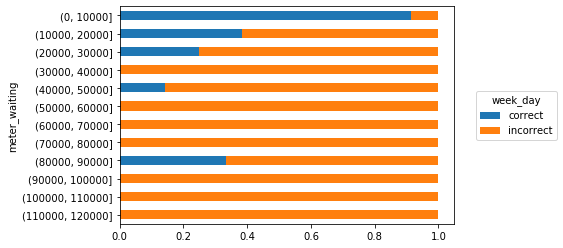

In [371]:
bins = [x*120 for x in range(13)]
counts = df.groupby([pd.cut(df["drop_time"], bins), 'label']).size().unstack('label')
label_counts = counts.sum(axis='columns')
counts = counts.div(label_counts,axis='index')
ax = counts.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='week_day'
)

(label            correct  incorrect
 meter_waiting                      
 (0, 800]           13403       1136
 (800, 1600]          962        135
 (1600, 2400]         234         44
 (2400, 3200]         101         24
 (3200, 4000]          40         10
 (4000, 4800]          23          8
 (4800, 5600]          12          4
 (5600, 6400]           7          7
 (6400, 7200]           7          2
 (7200, 1000000]       17         63, label             correct  incorrect
 meter_waiting                       
 (0, 800]         0.921865   0.078135
 (800, 1600]      0.876937   0.123063
 (1600, 2400]     0.841727   0.158273
 (2400, 3200]     0.808000   0.192000
 (3200, 4000]     0.800000   0.200000
 (4000, 4800]     0.741935   0.258065
 (4800, 5600]     0.750000   0.250000
 (5600, 6400]     0.500000   0.500000
 (6400, 7200]     0.777778   0.222222
 (7200, 1000000]  0.212500   0.787500)

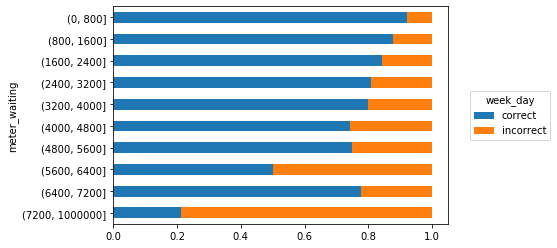

In [377]:
bins = [x*800 for x in range(10)]
bins.append(1000000)
counts = df.groupby([pd.cut(df["meter_waiting"], bins), 'label']).size().unstack('label')
label_counts = counts.sum(axis='columns')
label_counts = counts.div(label_counts,axis='index')
ax = label_counts.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='week_day'
)
counts,label_counts

In [137]:
df['meter_waiting'].describe()

count     16968.000000
mean        628.875000
std        8064.657846
min           0.000000
25%          33.000000
50%         123.000000
75%         351.000000
max      453650.000000
Name: meter_waiting, dtype: float64

In [11]:
ride_pred = np.array(loadtxt('432_preds.txt', delimiter=','))

In [12]:
ride_pred = ride_pred.astype('int')

In [8]:

thresh_pred = np.array((ride_pred[:,1] > 0.5).astype('int'))

IndexError: too many indices for array

In [13]:
sum(ride_pred)

8132

In [14]:
ride_pred = np.round(thresh_pred).astype('int')

NameError: name 'thresh_pred' is not defined

In [15]:
submission_df = pd.read_csv("sample_submission.csv", 
                            index_col="tripid")

In [16]:
submission_df

,prediction
tripid,
213284604,1
213286352,0
213293973,0
213294622,1
213298687,1
...,...
222856243,1
222857785,0
222858416,0


In [17]:
submission_df['prediction'] = ride_pred

In [18]:
submission_df

,prediction
tripid,
213284604,1
213286352,1
213293973,1
213294622,1
213298687,1
...,...
222856243,1
222857785,1
222858416,1


In [19]:
ride_pred.sum()

8132

In [20]:
submission_df.to_csv('my_submission_23.csv', index=True)

In [29]:
df

NameError: name 'df' is not defined

In [331]:
df['same_loc'] = pd.Series(df['acct_trip_distance'] == 0).astype('int')

In [340]:
df[df['additional_fare'] > 100][:100]

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,week_day,trip_distance,acct_trip_distance,per_km,same_loc
3354,193396226,110.50,895.0,90.0,0.000000,47.0,873,888,6.86456,79.8714,6.84115,79.8723,358.27,incorrect,2,2.605787,2.605787,137.490153,0
3388,193461384,110.50,993.0,115.0,6.647000,306.0,1083,1099,6.91789,79.8613,6.92730,79.8447,373.66,correct,2,2.110746,2.110746,177.027500,0
3423,193416241,110.50,1721.0,140.0,5.837800,83.0,1259,1288,6.92019,79.8627,6.92867,79.8638,160.50,incorrect,2,1.000000,0.951017,160.500000,0
3554,193655511,110.50,1059.0,190.0,0.000000,137.0,968,986,6.90017,79.8772,6.91923,79.8507,270.08,correct,3,3.613463,3.613463,74.742707,0
3569,193671594,110.50,1632.0,625.0,26.472400,17.0,1026,1053,6.87341,79.8802,6.92098,79.8692,213.19,correct,3,5.428836,5.428836,39.269926,0
3572,193677619,110.50,55891.0,53165.0,3018.373800,280.0,1047,539,6.90943,79.8574,6.87659,79.9918,3949.40,incorrect,3,15.284147,15.284147,258.398464,0
3586,193720577,110.50,84.0,80.0,0.000000,147.0,1130,1131,6.87659,79.8654,6.87610,79.8655,160.50,incorrect,3,1.000000,0.055610,160.500000,0
3691,193852558,110.50,2297.0,647.0,37.396600,150.0,756,795,6.90765,79.8640,6.95864,79.8635,531.08,incorrect,4,5.671878,5.671878,93.633892,0
3721,193874639,110.50,74.0,49.0,2.856700,243.0,844,845,6.86790,79.8735,6.86762,79.8737,163.35,correct,4,1.000000,0.038181,163.350000,0
3729,193882463,110.50,2598.0,428.0,0.000000,56.0,870,914,6.86532,79.9093,6.93279,79.8684,488.55,correct,4,8.758863,8.758863,55.777788,0


In [348]:
df['high_add_fare'] = pd.Series(df['additional_fare'] >  100).astype('int')

In [368]:
df['high_duration'] = pd.Series(df['duration'] >  30000).astype('int')

In [369]:
df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,...,drop_lon,fare,label,week_day,trip_distance,acct_trip_distance,per_km,same_loc,high_add_fare,high_duration
0,189123628,10.5,834.0,56.0,0.0000,64.0,20,34,6.86252,79.8993,...,79.8783,270.32,correct,4,5.094369,5.094369,53.062512,0,0,0
1,189125358,10.5,791.0,47.0,0.0000,134.0,56,69,6.88589,79.8984,...,79.8923,197.85,correct,4,3.169052,3.169052,62.431918,0,0,0
2,189125719,10.5,1087.0,80.0,0.0000,61.0,68,86,6.90839,79.8651,...,79.9146,301.64,correct,4,6.307375,6.307375,47.823385,0,0,0
3,189127273,10.5,598.0,271.0,15.6638,68.0,147,157,6.92570,79.8895,...,79.8971,82.30,correct,4,1.000000,0.862217,82.300000,0,0,0
5,189129552,10.5,3407.0,182.0,0.0000,112.0,338,395,7.13402,79.8969,...,79.8649,1065.02,correct,4,24.214638,24.214638,43.982486,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1327,1341,7.29073,80.6367,...,80.6557,198.26,correct,4,2.106037,2.106037,94.138917,0,0,0
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1387,1423,6.90569,79.8516,...,79.9389,581.23,correct,4,10.871789,10.871789,53.462222,0,0,0
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1401,1405,7.09210,79.9000,...,79.9017,76.20,correct,4,1.045847,1.045847,72.859628,0,0,0
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1419,1433,6.94540,79.8768,...,79.9010,133.31,correct,4,2.879981,2.879981,46.288506,0,0,0


In [367]:
test_df[test_df['duration'] > 30000]

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
362,213606719,30.5,32644,26725,1544.705000,46,2/2/2020 20:38,2/3/2020 5:42,7.29060,80.6328,7.29045,80.6621,2490.34
685,213971441,10.5,88295,87704,5024.669600,24,2/4/2020 20:52,2/5/2020 21:23,6.84405,79.9321,6.82121,79.8725,5632.27
701,213986614,10.5,53503,49156,2841.216800,7738,2/5/2020 3:41,2/5/2020 18:33,6.97728,79.8775,7.12881,79.8908,3792.70
852,214146818,10.5,64998,63991,3691.801600,313,2/5/2020 17:13,2/6/2020 11:16,6.87974,79.9415,6.87410,79.9434,4149.90
1084,214424712,10.5,40797,38067,2200.272600,165,2/6/2020 19:27,2/7/2020 6:47,6.80447,79.9314,6.74131,79.9029,2687.31
1514,214917319,10.5,165634,164927,9475.847600,44,2/9/2020 8:09,2/11/2020 6:09,6.86683,79.9224,6.72286,79.9304,10479.48
1773,215196870,10.5,62972,55505,3208.189000,961,2/10/2020 17:07,2/11/2020 10:37,6.71652,80.0638,6.90317,79.9285,5265.41
1826,215172183,10.5,447230,446934,25760.361800,142,2/10/2020 20:11,2/16/2020 0:25,6.89520,79.8686,6.72823,79.9319,26844.33
3279,216914489,10.5,31243,28184,1629.088965,30,2/17/2020 21:48,2/18/2020 6:28,6.84649,79.8983,6.86004,79.8642,2443.03
3731,217333922,10.5,33236,32801,1873.182400,69,2/19/2020 23:58,2/20/2020 9:12,7.19641,79.8618,7.21721,79.8571,2085.92
